In [2]:
from spectral_cube import SpectralCube
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt

"""
cube = SpectralCube.read('/orange/adamginsburg/w51/TaehwaYoo/ALMA_IMF/RestructuredImagingResults/W51-IRS2/B6/fullcubes_12m/W51-IRS2_B6_spw5_12M_spw5.JvM.image.pbcor.statcont.contsub.fits')

print(cube.spectral_axis)          # e.g., velocity or frequency axis
print(cube.spectral_axis.unit)     # usually 'm/s' or 'km/s'

rest_freq = 230.538e9*u.Hz  # Hz, rest frequency for CO(2-1)
cube = cube.with_spectral_unit('km/s', velocity_convention='radio', rest_value=rest_freq)

subcube = cube.spectral_slab( 70* u.km/u.s, 90 * u.km/u.s)

moment0 = subcube.moment(order=0)

moment0.write('fitsfiles/moment0.fits', overwrite=True)
"""

/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


"\ncube = SpectralCube.read('/orange/adamginsburg/w51/TaehwaYoo/ALMA_IMF/RestructuredImagingResults/W51-IRS2/B6/fullcubes_12m/W51-IRS2_B6_spw5_12M_spw5.JvM.image.pbcor.statcont.contsub.fits')\n\nprint(cube.spectral_axis)          # e.g., velocity or frequency axis\nprint(cube.spectral_axis.unit)     # usually 'm/s' or 'km/s'\n\nrest_freq = 230.538e9*u.Hz  # Hz, rest frequency for CO(2-1)\ncube = cube.with_spectral_unit('km/s', velocity_convention='radio', rest_value=rest_freq)\n\nsubcube = cube.spectral_slab( 70* u.km/u.s, 90 * u.km/u.s)\n\nmoment0 = subcube.moment(order=0)\n\nmoment0.write('fitsfiles/moment0.fits', overwrite=True)\n"

In [3]:
from spectral_cube import SpectralCube
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
import os
from reproject import reproject_interp
import matplotlib.pyplot as plt
from regions import Regions
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import sys
sys.path.append('/home/t.yoo/Paths')
import Paths.Paths as paths

Path = paths.filepaths()
image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

image_sub_filenames = {
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/F405_minus_F410cont_pipeline_v0.1.fits",
    "f410m-f405n": "/orange/adamginsburg/jwst/w51/F410_minus_F405_fractional_bandwidth_pipeline_v0.1.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/F187_minus_F182cont_pipeline_v0.1.fits",

}


reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected/'
repr140_image_filenames = {x: y.replace("i2d", "i2d_reprj_f140") for x,y in image_filenames.items()}
repr140_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr140_image_filenames.items()}

img1 = fits.getdata(repr140_image_filenames['f187n'])
img2 = fits.getdata(repr140_image_filenames['f360m'])
img3 = fits.getdata(repr140_image_filenames['f405n'])
ref_fits = fits.open(image_filenames['f140m'])
tgt_header = fits.getheader(image_filenames['f140m'], ext=('SCI', 1))

wcs_header = WCS(tgt_header)




alma_b3_fits = fits.open(Path.w51n_b3_tt0)
alma_b3_image = alma_b3_fits[0].data
if len(alma_b3_image.shape)!=2:
    alma_b3_image = alma_b3_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_b3_wcs = WCS(alma_b3_fits[0].header, naxis=2)
print()
alma_b6_fits = fits.open(Path.w51n_b6_tt0)
alma_b6_image = alma_b6_fits[0].data
if len(alma_b6_image.shape)!=2:
    alma_b6_image = alma_b6_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_b6_wcs = WCS(alma_b6_fits[0].header, naxis=2)



CO_moment0_fits = fits.open('/orange/adamginsburg/w51/TaehwaYoo/fitsfile_jwst/moment0.fits')
CO_moment0_wcs = WCS(CO_moment0_fits[0].header, naxis=2)
CO_moment0_image = CO_moment0_fits[0].data
#CO_moment0_reproj_image, _ = reproject_interp((CO_moment0_image, CO_moment0_wcs), wcs_header, )
CO_moment0_reproj_image = fits.open('/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/COmom0_reprj_f140.fits')[0].data


vla_kuband_fits = fits.open('/orange/adamginsburg/w51/TaehwaYoo/vla/2016paper/W51Ku_C_Aarray_continuum_2048_high_uniform.clean.image.fits')
#vla_reproj, _ = reproject_interp((vla_kuband_fits[0].data, WCS(vla_kuband_fits[0].header, naxis=2)), wcs_header)
vla_reproj = fits.open('/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/vla_reproj_f140.fits')[0].data
#alma_b3_reproj_image, _ = reproject_interp((alma_b3_image, alma_b3_wcs), wcs_header, shape_out = alma_b3_image.shape)

#alma_b6_reproj_image, _ = reproject_interp((alma_b6_image, alma_b6_wcs), wcs_header, shape_out = alma_b6_image.shape)

#alma_b3_reproj_image = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/fitsfile_jwst/alma_b3_reprojected_adaptive.fits')
#alma_b6_reproj_image = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/fitsfile_jwst/alma_b6_reprojected_adaptive.fits')
#alma_b3_reproj_image = fits.getdata('/orange/adamginsburg/jwst/w51/reduced_fits_images/alma_w51n_b3_reprojected.fits')
#alma_b6_reproj_image = fits.getdata('/orange/adamginsburg/jwst/w51/reduced_fits_images/alma_w51n_b6_reprojected.fits')



In [4]:
"""
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection=wcs_header)
ax2 = fig.add_subplot(122, projection=wcs_header)
ax1.imshow(CO_moment0_reproj_image, origin='lower')
ax2.imshow(alma_b3_reproj_image, origin='lower')
"""

"\nfig = plt.figure(figsize=(20, 10))\nax1 = fig.add_subplot(121, projection=wcs_header)\nax2 = fig.add_subplot(122, projection=wcs_header)\nax1.imshow(CO_moment0_reproj_image, origin='lower')\nax2.imshow(alma_b3_reproj_image, origin='lower')\n"

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import numpy as np
def make_rgb_image(repr480_image_filenames, filt1, filt2, filt3, cutout_region=None,
    alpha_red=0.7, alpha_green=0.78, alpha_blue=0.74, 
    figsize=(48,20),
    vmin_img1=-2.12, vmax_img1=3987, vmin_img2=-2.12, vmax_img2=2409, vmin_img3=-2.12, vmax_img3=798, 
    color_scheme='rgb', stretch='log'):
    """
    Create an RGB image from three filters.
    """
    img1 = fits.getdata(repr480_image_filenames[filt1])
    img2 = fits.getdata(repr480_image_filenames[filt2])
    img3 = fits.getdata(repr480_image_filenames[filt3])

    ref_fits = fits.open(repr480_image_filenames['f140m'])
    tgt_header = fits.getheader(repr480_image_filenames['f140m'])

    wcs_header = WCS(tgt_header)
    if color_scheme == 'rgb':
        cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
        cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])
    elif color_scheme == 'cmyk':
        cmap1 = LinearSegmentedColormap.from_list('magenta', [(0, 0, 0), (1, 0, 1)])
        cmap2 = LinearSegmentedColormap.from_list('yellow', [(0, 0, 0), (1, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('cyan', [(0, 0, 0), (0, 1, 1)])

    if cutout_region is not None:
        from regions import Regions
        from astropy.nddata import Cutout2D
      
        cutout1 = Cutout2D(img1, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header)
        cutout2 = Cutout2D(img2, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header)
        cutout3 = Cutout2D(img3, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header) 
        img1 = cutout1.data
        img2 = cutout2.data
        img3 = cutout3.data

    if stretch == 'log':
        norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)
    elif stretch == 'linear':
        norm1 = simple_norm(img1, stretch='linear', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='linear', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='linear', vmin=vmin_img3, vmax=vmax_img3)

    color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
    color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
    color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue

    composite = color1_rgb + color2_rgb + color3_rgb
    composite = np.clip(composite, 0, 1)

    fig = plt.figure(figsize=figsize )
    ax = fig.add_subplot(111, projection=wcs_header)

    ax.imshow(composite, origin='lower', )
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')


    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension')
    ra.set_ticklabel(rotation=25, pad=30)
    dec.set_axislabel('Declination')
    
    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')
    print(cutout1.data.shape)
    print(cutout2.data.shape)
    print(cutout3.data.shape)
    return fig, ax, composite, cutout1.wcs, cutout1
    



(535, 1345)
(535, 1345)
(535, 1345)


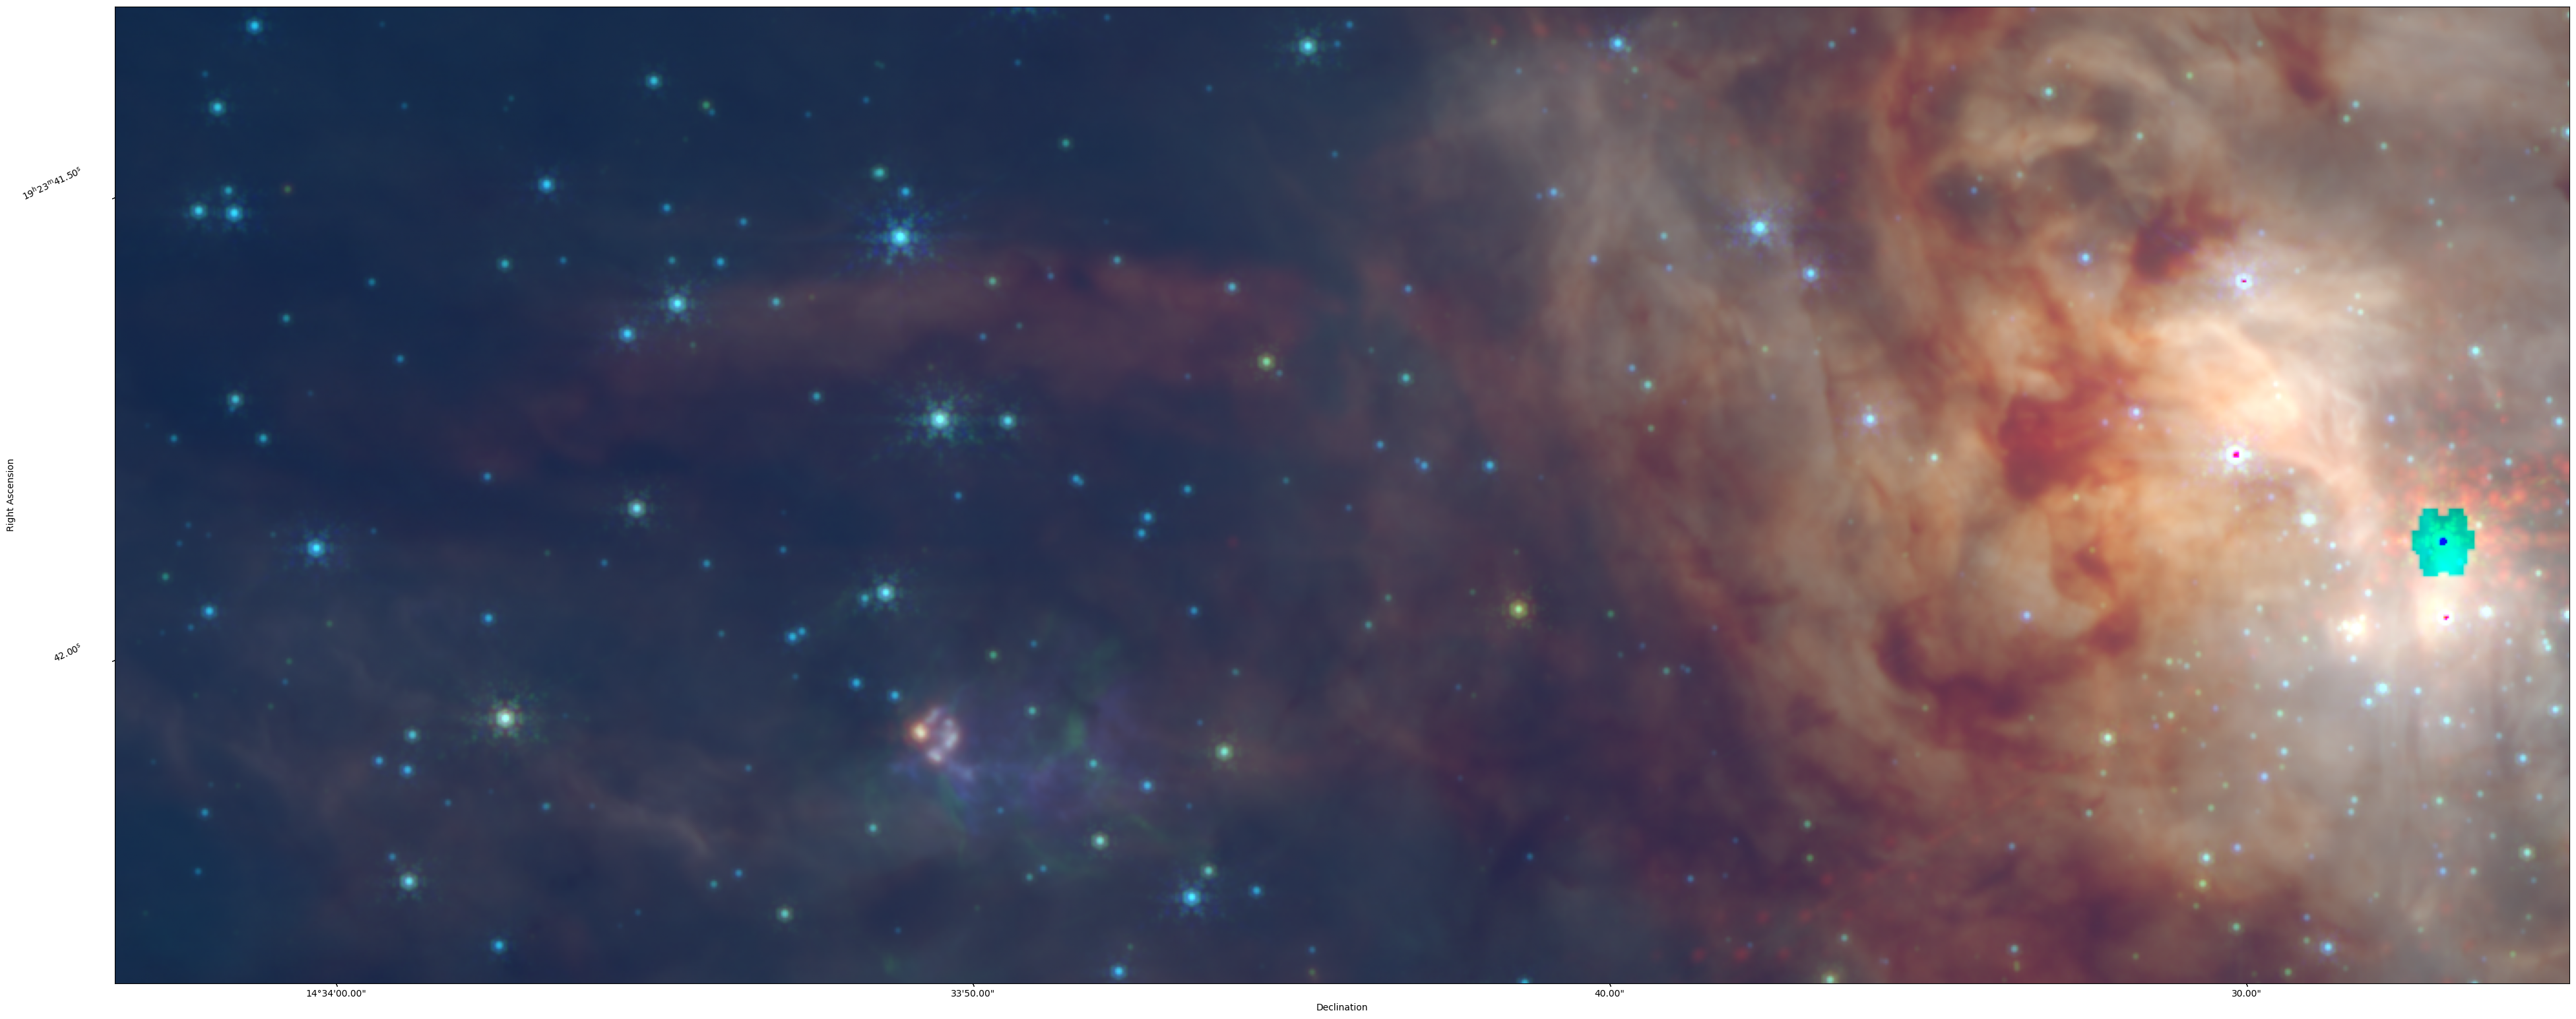

In [6]:
overview_reg = Regions.read('regions/clean_overview.reg')[0]
zoomin_reg = Regions.read('regions/clean_zoomin.reg')[0]
source_reg = Regions.read('regions/clean_source.reg')[0]


from astropy.table import Table
from astropy.coordinates import Angle, SkyCoord


zoomin_reg_ratio = zoomin_reg.width / zoomin_reg.height
source_reg.width = source_reg.height * zoomin_reg_ratio

fig, ax, rgbimage_overview, overview_wcs, overview_cutout = make_rgb_image(repr140_image_filenames, 'f405n', 'f210m', 'f162m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.04267011225633506, vmax_img1=28679, vmin_img2=-1.22, vmax_img2=1456, vmin_img3=-2.12, vmax_img3=482, cutout_region=overview_reg)
plt.savefig(f'rgbs/overview_rgb_reg_f405n-f210m-f162m.png', dpi=100, bbox_inches='tight')
plt.show()


(185, 239)
(185, 239)
(185, 239)


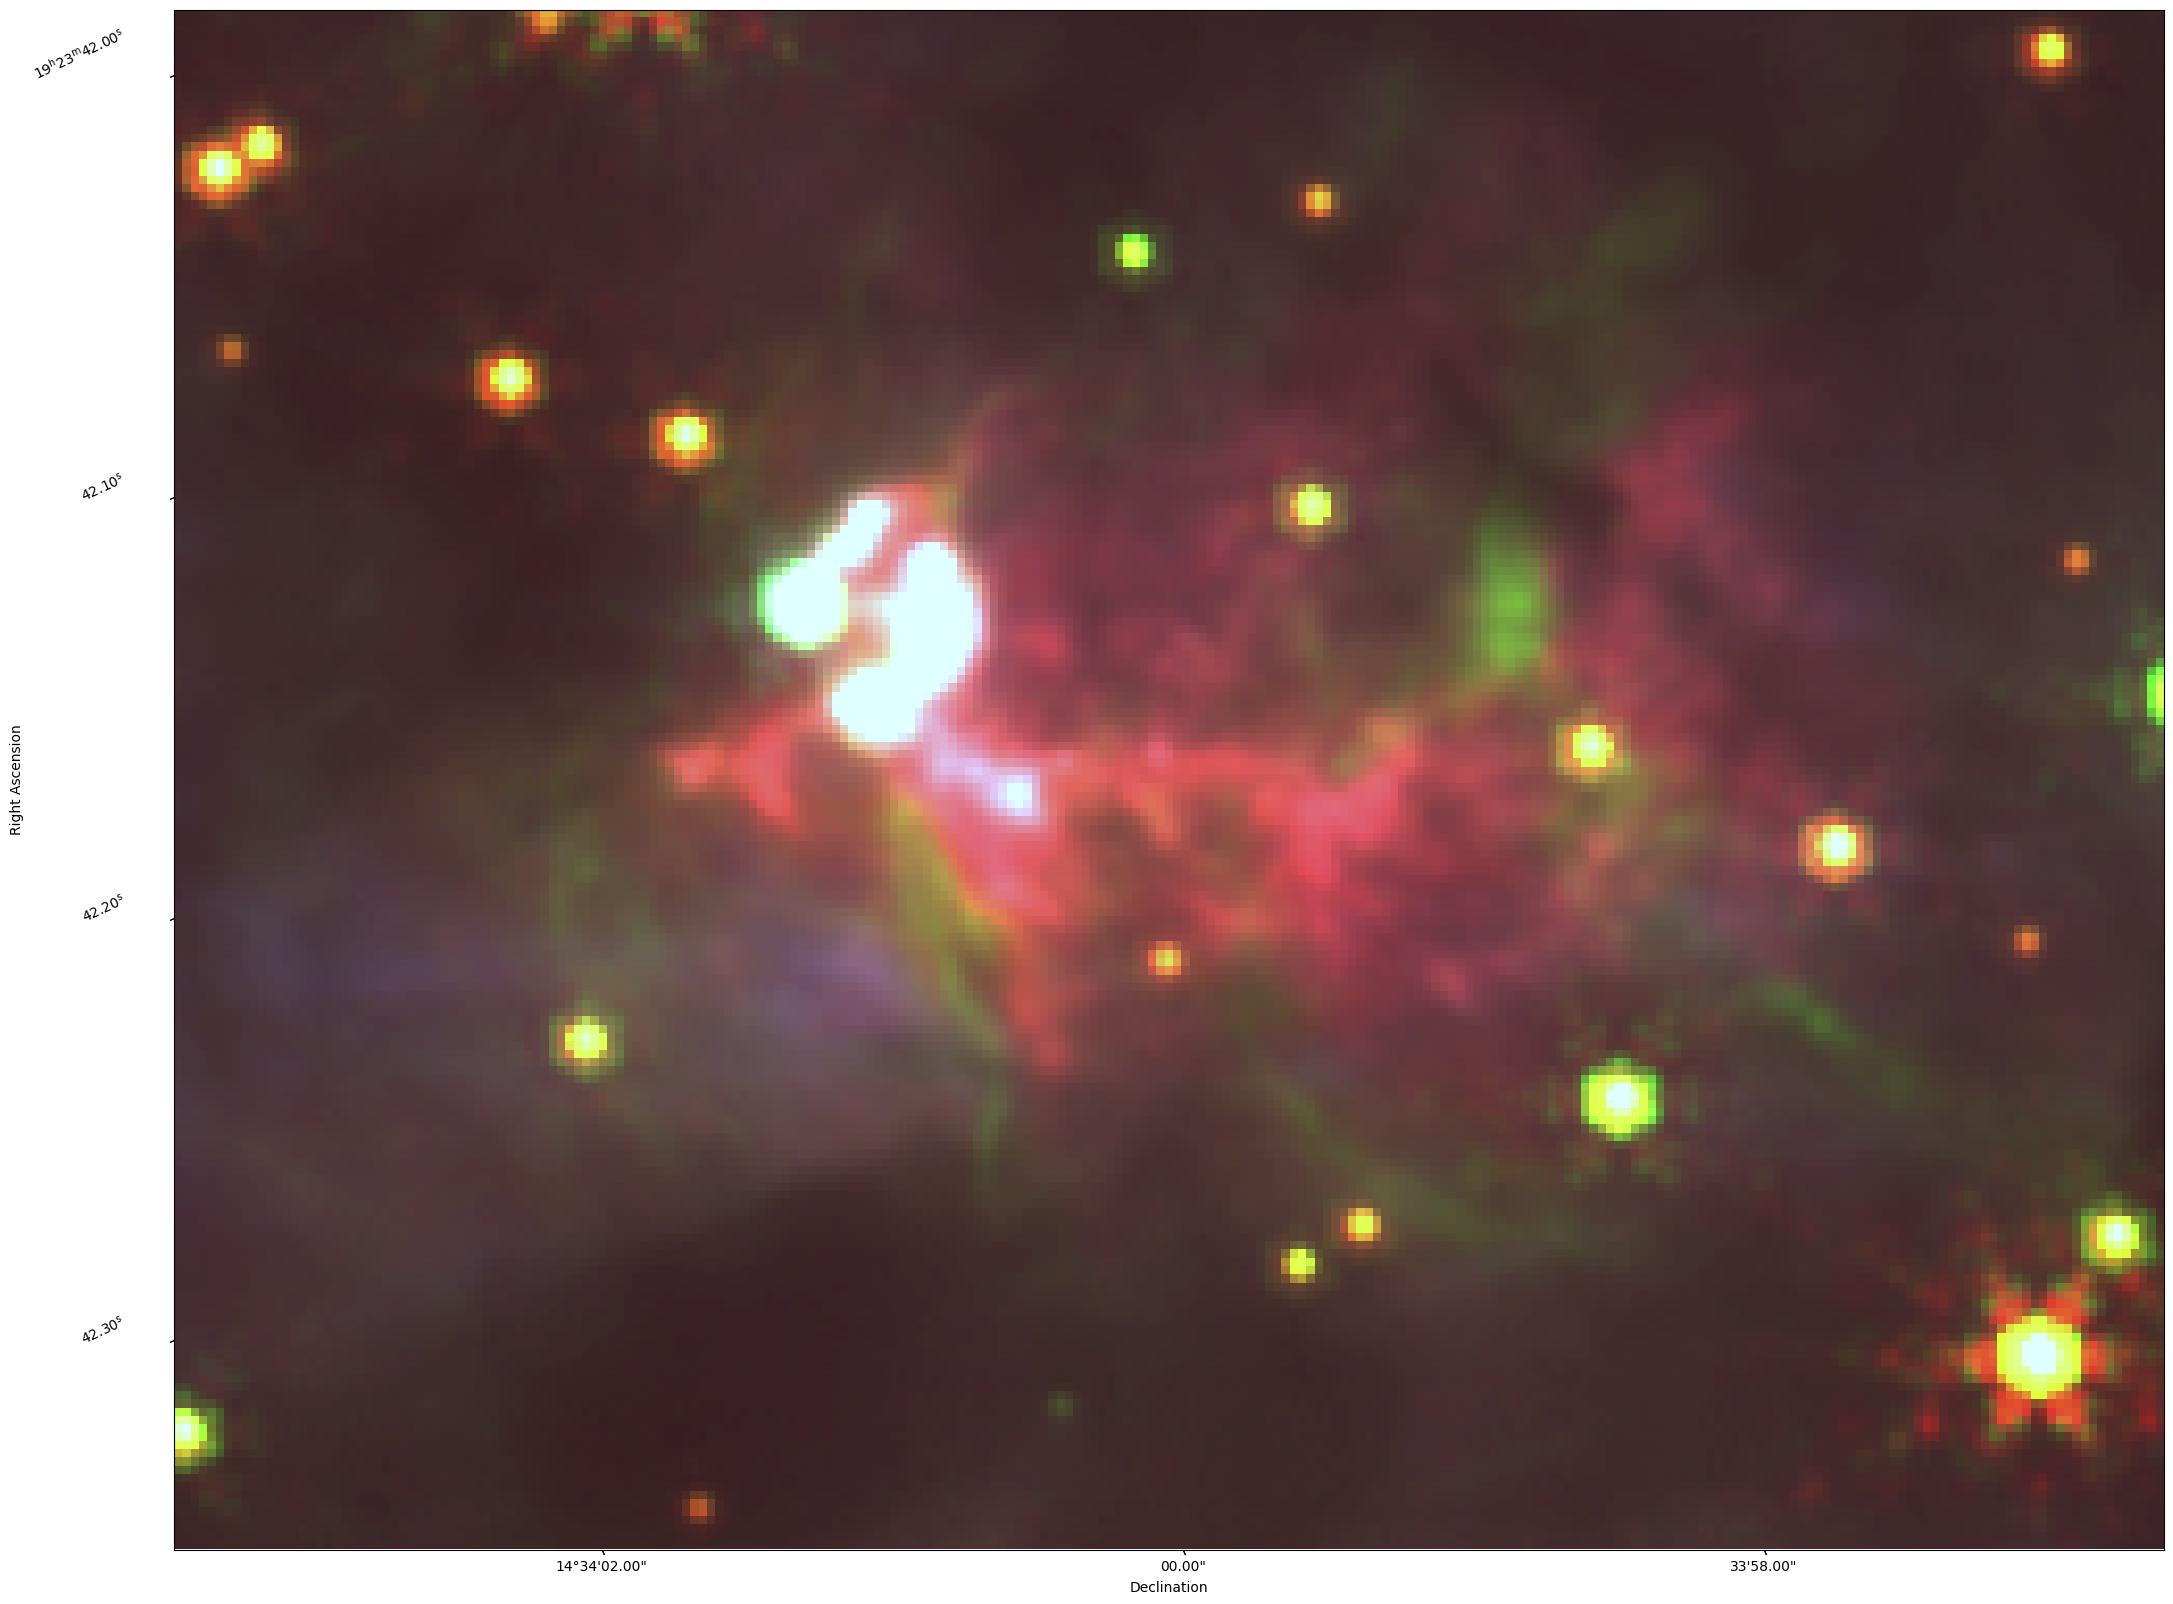

(185, 239, 3)


In [7]:
fig, ax, rgbimage_zoomin,_, zoomin_cutout = make_rgb_image(repr140_image_filenames,  'f162m', 'f210m','f187n',alpha_red=0.88, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=-1.7671406081315357, vmax_img1=10.06117385973986, vmin_img2=-1.162161170845977, vmax_img2=29.4088945802996, vmin_img3=-16.008438581575838, vmax_img3=203.61288554664003, cutout_region=zoomin_reg, stretch='linear')
plt.savefig(f'rgbs/overview_rgb_zoominreg_f162m-f210m-f187n.png', dpi=100, bbox_inches='tight')
plt.show()
print(rgbimage_zoomin.shape)


f140m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f140m-merged_i2d_reprj_f140.fits


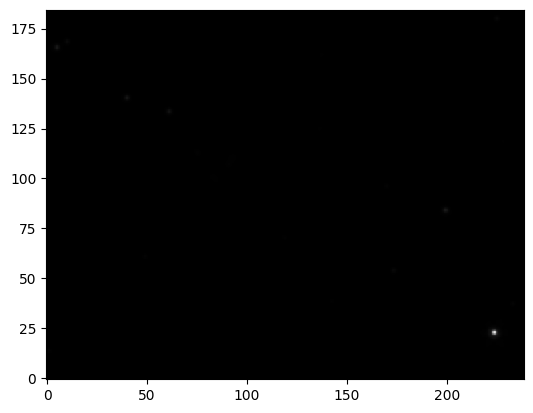

f150w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f150w-merged_i2d_reprj_f140.fits


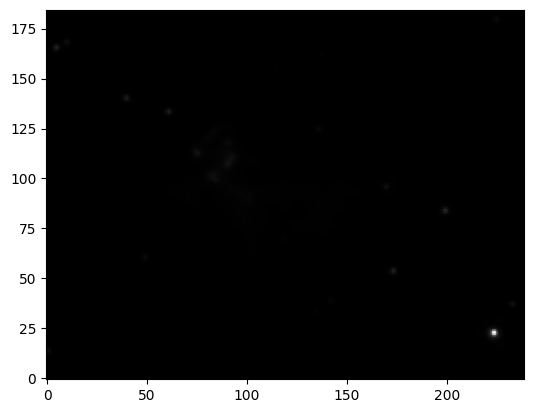

f162m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f162m-merged_i2d_reprj_f140.fits


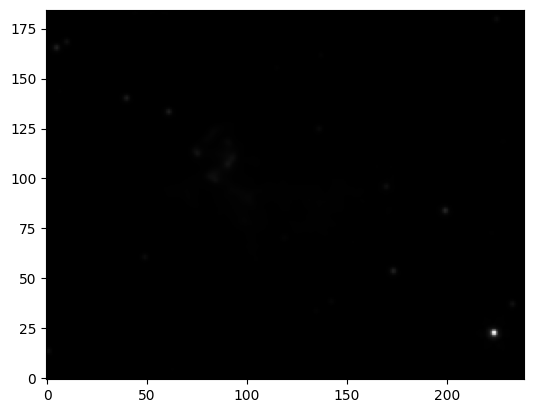

f182m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f182m-merged_i2d_reprj_f140.fits


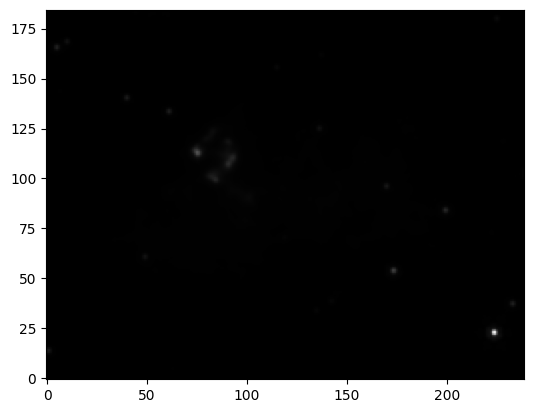

f187n /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f187n-merged_i2d_reprj_f140.fits


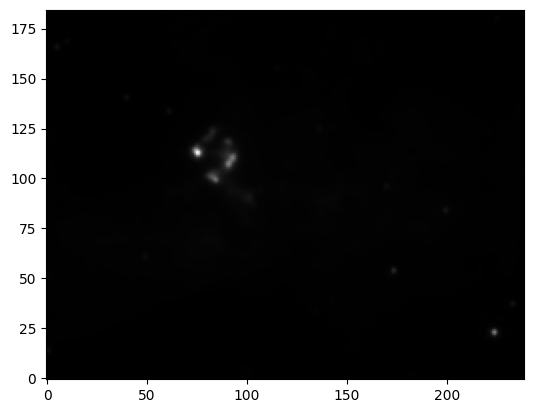

f210m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f210m-merged_i2d_reprj_f140.fits


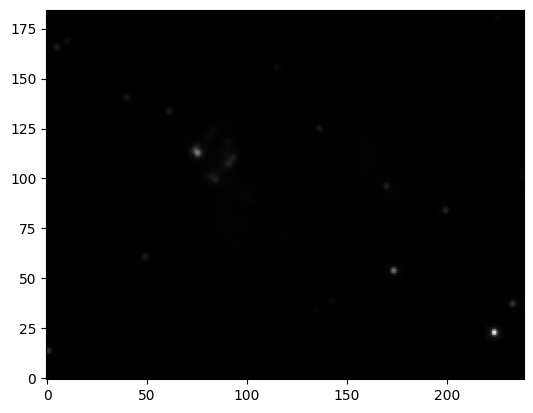

f335m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f335m-merged_i2d_reprj_f140.fits


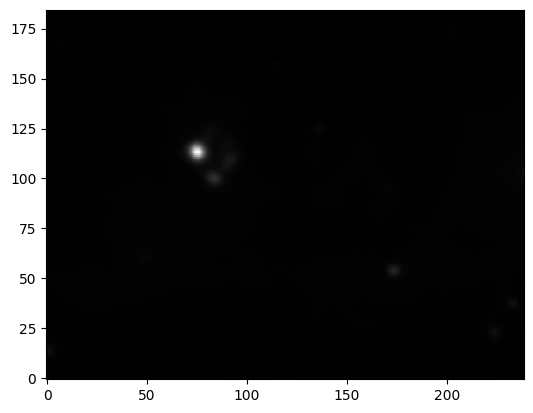

f360m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f360m-merged_i2d_reprj_f140.fits


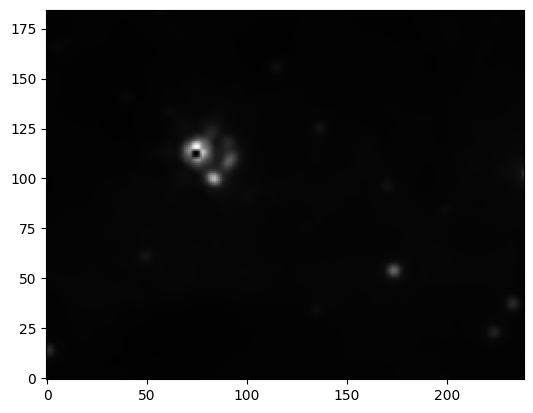

f405n /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f405n-merged_i2d_reprj_f140.fits


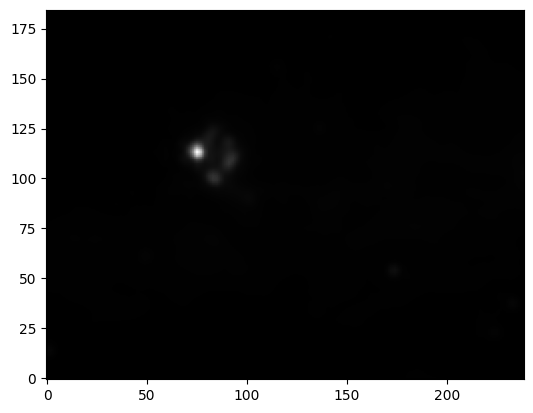

f410m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f410m-merged_i2d_reprj_f140.fits


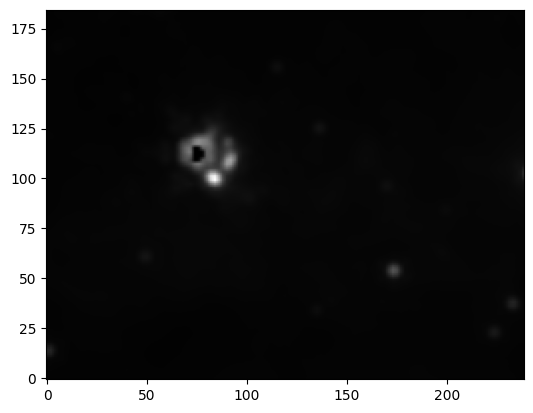

f480m /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o001_t001_nircam_clear-f480m-merged_i2d_reprj_f140.fits


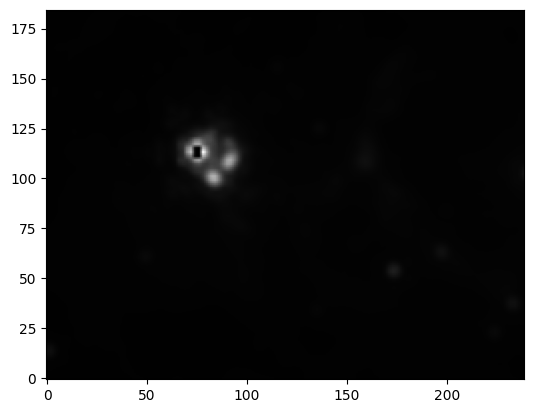

f560w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o002_t001_miri_f560w_i2d_reprj_f140.fits


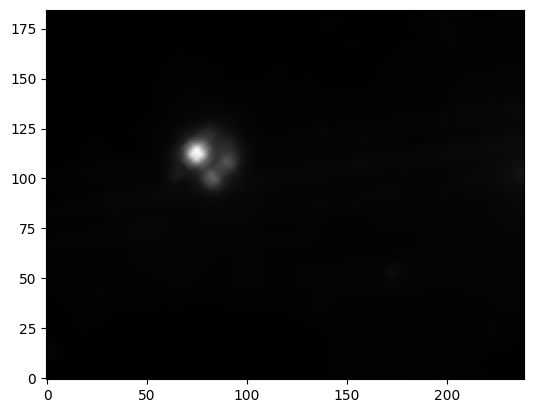

f770w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o002_t001_miri_f770w_i2d_reprj_f140.fits


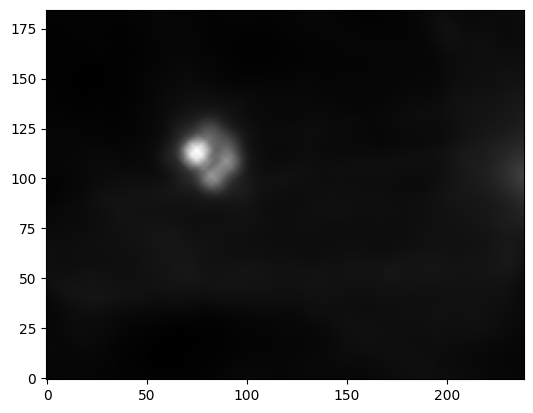

f1000w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o002_t001_miri_f1000w_i2d_reprj_f140.fits


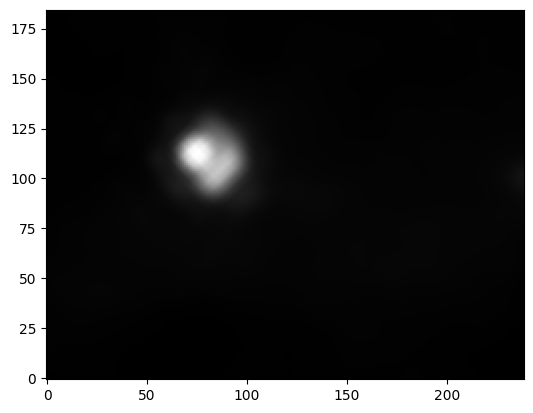

f1280w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o002_t001_miri_f1280w_i2d_reprj_f140.fits


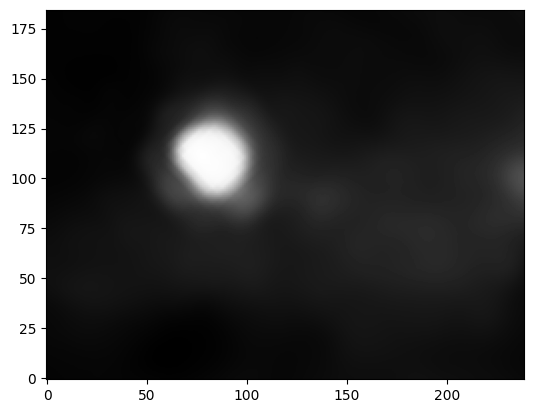

f2100w /orange/adamginsburg/jwst/w51/data_reprojected/jw06151-o002_t001_miri_f2100w_i2d_reprj_f140.fits


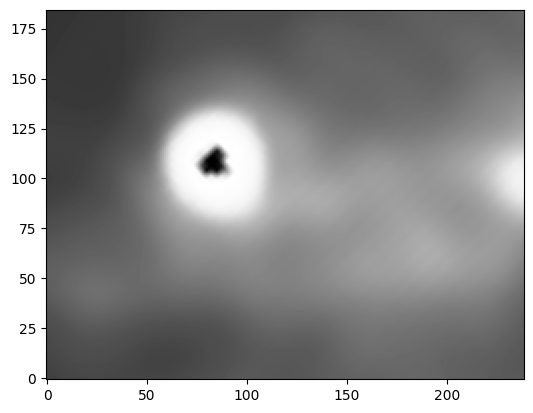

In [10]:
for filt in repr140_image_filenames.keys():
    if os.path.exists(repr140_image_filenames[filt]):
        print(filt, repr140_image_filenames[filt])
        cutout = Cutout2D(fits.getdata(repr140_image_filenames[filt]), zoomin_reg.center, (zoomin_reg.width, zoomin_reg.height), wcs=wcs_header)
        fig=plt.figure()
        plt.imshow(cutout.data, origin='lower', cmap='gray')
        plt.show()
    
        hdu = fits.PrimaryHDU(data=cutout.data, header=cutout.wcs.to_header())
        hdu.writeto(f'/orange/adamginsburg/jwst/w51/data_cutout_for_knot/{filt}.fits', overwrite=True)


In [9]:
dfdf

NameError: name 'dfdf' is not defined

Region: RectangleSkyRegion
center: <SkyCoord (ICRS): (ra, dec) in deg
    (290.91518855, 14.52508879)>
width: 9.0 arcsec
height: 9.0 arcsec
angle: 96.16096 deg
19:23:39.64525296
14:31:30.3196296
pix (array(642.87555242), array(642.09230585))
wB.wcs.crval [290.91666667  14.51805556]
wB.wcs.crpix [7251. 7251.]
(14500, 14500)
reg.center <SkyCoord (ICRS): (ra, dec) in deg
    (290.91518855, 14.52508879)>
reg.center.frame <ICRS Coordinate: (ra, dec) in deg
    (290.91518855, 14.52508879)>
celestial_frame <ICRS Frame>
wB WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN' 'DEC--SIN' 
CRVAL : np.float64(290.9166666667) np.float64(14.51805555557) 
CRPIX : np.float64(7251.0) np.float64(7251.0) 
PC1_1 PC1_2  : np.float64(1.0) np.float64(0.0) 
PC2_1 PC2_2  : np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-1.944444444444e-06) np.float64(1.944444444444e-06) 
NAXIS : 14500  14500
wB.world_axis_names ['', '']
ny, nx 1286 1286
wB_cdelt [1.94444444e-06 1.94444444e-06]
Position angle (deg) wH: -

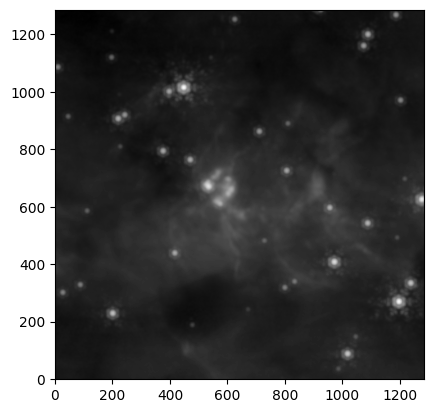

In [ ]:
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.wcs.utils import wcs_to_celestial_frame
from astropy.wcs.utils import proj_plane_pixel_area
def get_pa(wcs):
    cd = wcs.pixel_scale_matrix
    pa = np.degrees(np.arctan2(cd[0,1], cd[0,0]))
    return pa
def reproject_to_cutout_dontuse(cutout, target_img, target_wcs, ref_wcs, savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='reprojected.fits'):
    
    scales = proj_plane_pixel_scales(target_wcs.celestial) * u.deg
    
    pixscale_deg = np.abs(target_wcs.pixel_scale_matrix[1,1])
    
    cutout_size_deg = np.array(cutout.wcs.pixel_shape) * np.abs(ref_wcs.pixel_scale_matrix[1,1])
    # Shape in target pixel scale
    
    shape_out = np.round(cutout_size_deg / pixscale_deg).astype(int)

    # --- Make new WCS: same pixel scale as target_hdu, centered on cutout center ---
    new_wcs = target_wcs.deepcopy()
    new_wcs.wcs.crval = [cutout.wcs.wcs.crval[0], cutout.wcs.wcs.crval[1]]  # center in degrees
    new_wcs.wcs.crpix = [shape_out[1]/2, shape_out[0]/2]  # center pixel
    new_wcs.wcs.cdelt = [target_wcs.wcs.cdelt[0], target_wcs.wcs.cdelt[1]]  # keep pixel scale
    print(shape_out)
    # --- Reproject ---
    array, footprint = reproject_interp((target_img, target_wcs), new_wcs, shape_out=tuple(shape_out))
    print(array.shape)
    hdu_out = fits.PrimaryHDU(array, header=new_wcs.to_header())
    hdu_out.writeto(f'{savedir}/{filename}', overwrite=True)
    return hdu_out

def reproject_to_cutout_old(cutout, target_img,  target_wcs,  savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='reprojected.fits'):
    
    array, footprint = reproject_interp(
    (target_img, target_wcs),             # the image to reproject
    cutout.wcs,             # WCS of cutout
    shape_out=cutout.data.shape  # pixel shape of cutout
     )

    return array
def reproject_to_cutout(cutout, target_img, target_wcs, ref_wcs, savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='reprojected.fits'):
    center_ra, center_dec = cutout.wcs.wcs.crval
    from astropy.wcs.utils import proj_plane_pixel_scales
    pixscale_a_deg = proj_plane_pixel_scales(target_wcs) # pixel scale of jwst image
    cutout_size_deg = np.array(cutout.shape) * proj_plane_pixel_scales(ref_wcs) # sky extent of cutout
    shape_out = np.round(cutout_size_deg / pixscale_a_deg).astype(int)
    new_wcs = target_wcs.deepcopy()
    new_wcs.wcs.crval = [center_ra, center_dec]
    new_wcs.wcs.crpix = [shape_out[1] / 2, shape_out[0] / 2]  # center pixel

    # --- Reproject image A onto the new WCS ---
    array_reproj, footprint = reproject_interp((target_img, target_wcs), new_wcs, shape_out=tuple(shape_out))
    hdu_out = fits.PrimaryHDU(array_reproj, header=new_wcs.to_header())
    return hdu_out

def reproject_to_hybridwcs(reg, imageA, wA_all, imageB, wB_all):
    """
    Reproject image A onto a hybrid WCS that has the pixel scale of image B but the orientation of image A.
    Parameters:
    reg: astropy regions Region object defining the cutout region
    imageA: 2D numpy array of the first image (e.g., JWST)
    wA_all: WCS object for image A
    imageB: 2D numpy array of the second image (e.g., ALMA)
    wB_all: WCS object for image B
    """

    wA = wA_all.sub(['celestial'])
    wB = wB_all.sub(['celestial'])


    cutB = Cutout2D(imageB, reg.center, (reg.width, reg.height), wcs=wB) #alma cutout
    reg_center_in_wcs = reg.center.transform_to(wcs_to_celestial_frame(wB))
    pix = cutB.wcs.world_to_pixel(reg_center_in_wcs)

    celestial_frame = wcs_to_celestial_frame(wB)
  
    scales_cut_deg = proj_plane_pixel_scales(cutB.wcs)   # deg/pix pixel size of alma cutout
    ny, nx = cutB.data.shape
    wB_cdelt = wB.wcs.cdelt
    wB_cdelt[0] = wB_cdelt[0] * (-1) # for some reason I have to do this
   
    size_deg_y, size_deg_x = scales_cut_deg[0]*ny, scales_cut_deg[1]*nx

    CD_A = wA.pixel_scale_matrix                   # 2x2
    rotA = CD_A / np.linalg.norm(CD_A, axis=0)     # unit-length columns -> pure rotation

    # 2) pixel scales from B along x and y
    scales_B = proj_plane_pixel_scales(wB)         # [deg/pix_y, deg/pix_x]
    sy, sx = float(scales_B[0]), float(scales_B[1])

    # 3) new CD = rotation(A) with B's scales (matrix multiplication)
    CD_hybrid = rotA @ np.diag([sx, sy])

    # 4) choose output shape to cover the same sky size but at B's finer pixels
    nx_out = int(np.round(size_deg_x / sx))
    ny_out = int(np.round(size_deg_y / sy))

    scales_B = proj_plane_pixel_scales(wB)  # [deg/pix_y, deg/pix_x]
    # Get the pixel scales from wA (low-res image)
    scales_A = proj_plane_pixel_scales(wA)  # [deg/pix_y, deg/pix_x]

    # Compute the scaling factors for each axis
    scale_factor_x = scales_B[1] / scales_A[1]
    scale_factor_y = scales_B[0] / scales_A[0]

    # Apply scaling to the CD matrix of wA
    CD_hybrid = wA.pixel_scale_matrix.copy()
    CD_hybrid[0, 0] *= scale_factor_x
    CD_hybrid[0, 1] *= scale_factor_y
    CD_hybrid[1, 0] *= scale_factor_x
    CD_hybrid[1, 1] *= scale_factor_y

   
    wH = wA.deepcopy()
    wH.wcs.crval = [reg.center.ra.value, reg.center.dec.value]
    wH.wcs.crpix = [nx_out/2.0, ny_out/2.0]
    wH.wcs.cdelt = wB_cdelt

    # Get ALMA pixel scale (deg/pix)
    alma_scale = proj_plane_pixel_scales(wB)
    # Get JWST orientation (unit vectors)
    jwst_rot = wA.pixel_scale_matrix / np.linalg.norm(wA.pixel_scale_matrix, axis=0)
    # Build new CD matrix: JWST orientation, ALMA pixel scale
    pa_jwst = get_pa(wA)

    # Build new CD matrix: ALMA pixel scale, JWST orientation
    theta = np.radians(pa_jwst)
    cd = np.array([
        [alma_scale[1]*np.cos(theta), -alma_scale[0]*np.sin(theta)],
        [alma_scale[1]*np.sin(theta),  alma_scale[0]*np.cos(theta)]
    ])
    wH.wcs.cd = cd



    # Get ALMA pixel scale (deg/pix)
    alma_scale = proj_plane_pixel_scales(wB)
    # Get JWST orientation (unit vectors)
    jwst_rot = wA.pixel_scale_matrix / np.linalg.norm(wA.pixel_scale_matrix, axis=0)
    # Build new CD matrix: JWST orientation, ALMA pixel scale
    pa_jwst = get_pa(wA)

    # Build new CD matrix: ALMA pixel scale, JWST orientation
    theta = np.radians(pa_jwst)
    cd = np.array([
        [alma_scale[1]*np.cos(theta), -alma_scale[0]*np.sin(theta)],
        [alma_scale[1]*np.sin(theta),  alma_scale[0]*np.cos(theta)]
    ])
    wH2.wcs.cd = cd

    #print("wH.wcs.get_cd (output CD matrix):", wH.wcs.get_cd())
    print("Position angle (deg) wH:", get_pa(wH))
    shape_out = (ny_out, nx_out)  # shape of the output image
    # --- Reproject BOTH images to the hybrid grid ---
    A_on_H, fA = reproject_interp((imageA, wA), wH, shape_out=shape_out)
    B_on_H, fB = reproject_interp((imageB, wB), wH, shape_out=shape_out)
    #pxiel_scale of reprojected image A
    print("Pixel scale of image A (arcsec/pix):", proj_plane_pixel_scales(wA)*3600)
    print("Pixel scale of image B (arcsec/pix):", proj_plane_pixel_scales(wB)*3600)
    print("Pixel scale of reprojected images (arcsec/pix):", proj_plane_pixel_scales(wH)*3600)
    print("Shape of reprojected images:", A_on_H.shape, B_on_H.shape)
    print("Position angle (deg) wA:", get_pa(wA))
    print("Position angle (deg) wB:", get_pa(wB))
    print("Position angle (deg) wH:", get_pa(wH))

    print("Pixel scale of wH (arcsec/pix):", proj_plane_pixel_scales(wH)*3600)
    print("wH.wcs.cd:", wH.wcs.cd)
    print("wB.pixel_scale_matrix:", wB.pixel_scale_matrix)

    return A_on_H, B_on_H, wH



zoomin_reg_alma_highres = Regions.read('regions/outflow_zoomin_alma_highres.reg')[0]
print(zoomin_reg_alma_highres)

print(zoomin_reg_alma_highres.center.ra.to_string(unit=u.hour, sep=':'))  # RA only
print(zoomin_reg_alma_highres.center.dec.to_string(unit=u.deg, sep=':'))
#zoomin_alma = Cutout2D(alma_b3_image , zoomin_reg_alma_highres.center, (zoomin_reg_alma_highres.width, zoomin_reg_alma_highres.height), wcs=alma_b3_wcs)

#overview_alma = Cutout2D(alma_b3_reproj_image, overview_reg.center, (overview_reg.width, overview_reg.height), wcs=wcs_header)
#zoomin_alma = Cutout2D(alma_b3_image , zoomin_reg_alma_highres.center, (zoomin_reg_alma_highres.width, zoomin_reg_alma_highres.height), wcs=wcs_header)
#zoomin_alma_b3 = reproject_to_cutout(zoomin_cutout, alma_b3_image, alma_b3_wcs,  wcs_header, savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='zoomin_alma_b6.fits')

reprojected_210, reprojected_alma, wcs_210_alma = reproject_to_hybridwcs(zoomin_reg_alma_highres, fits.getdata(image_filenames['f210m']), WCS(fits.getheader(image_filenames['f210m'], ext=('SCI', 1))), 
                                                                      alma_b3_image, alma_b3_wcs)

plt.imshow(reprojected_210, origin='lower', cmap='gray', norm=simple_norm(reprojected_210, stretch='log'))




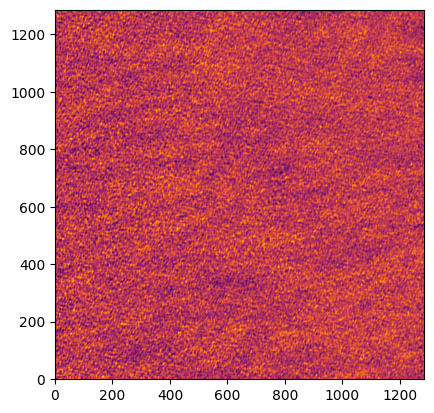

In [ ]:
plt.imshow(reprojected_alma, origin='lower', cmap='inferno')

In [ ]:
def copy_orientation(wcs_keep, wcs_rot):
    w_new = wcs_keep.deepcopy()

    # Get pixel scale from wcs_keep (deg/pix)
    scales = proj_plane_pixel_scales(wcs_keep)  # shape: [dy, dx] in deg/pix

    # Extract pure rotation from wcs_rot
    # Normalize CD matrix of wcs_rot to unit vectors (remove scale)
    cd_rot = wcs_rot.pixel_scale_matrix
    print(cd_rot)
    # Convert to pure rotation matrix by dividing each column by its length
    rot_only = cd_rot / np.linalg.norm(cd_rot, axis=0)

    # Now rebuild the CD matrix with wcs_keep's scales but wcs_rot's rotation
    cd_new = rot_only * scales
    w_new.wcs.cd = cd_new
    print(cd_new)
    return w_new
alma_b3_wcs_jwst = copy_orientation(alma_b3_wcs, wcs_header)
zoomin_reg_alma_highres = Regions.read('regions/outflow_zoomin_alma_highres.reg')[0]
zoomin_alma = Cutout2D(alma_b3_image , zoomin_reg_alma_highres.center, (zoomin_reg_alma_highres.width, zoomin_reg_alma_highres.height), wcs=alma_b3_wcs_jwst)

#overview_alma = Cutout2D(alma_b3_reproj_image, overview_reg.center, (overview_reg.width, overview_reg.height), wcs=wcs_header)
#zoomin_alma = Cutout2D(alma_b3_image , zoomin_reg_alma_highres.center, (zoomin_reg_alma_highres.width, zoomin_reg_alma_highres.height), wcs=wcs_header)
#zoomin_alma_b3 = reproject_to_cutout(zoomin_cutout, alma_b3_image, alma_b3_wcs,  wcs_header, savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='zoomin_alma_b6.fits')


plt.imshow(zoomin_alma.data, origin='lower', cmap='gray', norm=simple_norm(zoomin_alma.data, stretch='linear'))


[[ 3.44566976e-06 -7.96104875e-06]
 [-7.96104875e-06 -3.44566976e-06]]


AttributeError: No cd is present.

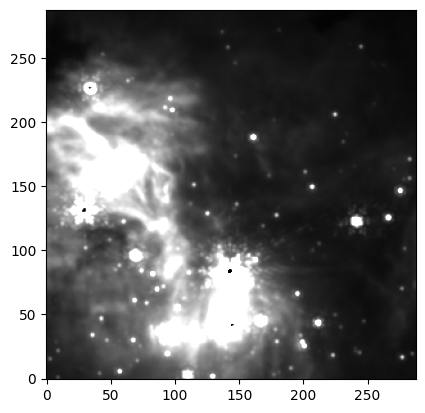

In [ ]:
hdu_f210m_zoomin = reproject_to_cutout(zoomin_alma, fits.getdata(image_filenames['f210m']), WCS(fits.getheader(image_filenames['f210m'], ext=('SCI', 1))),alma_b3_wcs,
                                        savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='f210m_to_alma_w51n_b3_zoomin.fits')
hdu_f162m_zoomin = reproject_to_cutout(zoomin_alma, fits.getdata(image_filenames['f162m']), WCS(fits.getheader(image_filenames['f162m'], ext=('SCI', 1))),alma_b3_wcs,
                                        savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='f162m_to_alma_w51n_b3_zoomin.fits')

hdu_f187n_zoomin = reproject_to_cutout(zoomin_alma, fits.getdata(image_filenames['f187n']), WCS(fits.getheader(image_filenames['f187n'], ext=('SCI', 1))),alma_b3_wcs,
                                        savedir='/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/', filename='f187n_to_alma_w51n_b3_zoomin.fits')

norm = simple_norm(hdu_f210m_zoomin.data, stretch='linear', vmin=-2.12, vmax=482)
plt.imshow(hdu_f210m_zoomin.data, origin='lower', cmap='gray',norm=norm)

In [ ]:
ㅇㅇ

NameError: name 'ᄋᄋ' is not defined

In [ ]:

zoomin_vla = Cutout2D(vla_reproj.squeeze(), zoomin_reg_alma_highres.center, (zoomin_reg_alma_highres.width, zoomin_reg_alma_highres.height), wcs=wcs_header)

alma_w51n_b6 = fits.open(Path.w51n_b6_tt0)
alma_w51n_b6_image = alma_w51n_b6[0].data
if len(alma_w51n_b6_image.shape)!=2:
    alma_w51n_b6_image = alma_w51n_b6_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_w51n_b6_wcs = WCS(alma_w51n_b6[0].header, naxis=2)
print(alma_w51n_b6_wcs)
source_reg_alma_highres = Regions.read('regions/outflow_source_alma_highres.reg')[0]
source_alma = Cutout2D(alma_w51n_b6_image, source_reg_alma_highres.center, (source_reg_alma_highres.height, source_reg_alma_highres.width), wcs=alma_w51n_b6_wcs)
print(alma_w51n_b6_image.shape)
if CO_moment0_image.ndim > 2:
    CO_moment0_image = np.squeeze(CO_moment0_image)

#CO_moment0_reproj_image_to_alma, _ = reproject_interp(
#    (CO_moment0_image, CO_moment0_wcs),
#    alma_w51n_b6_wcs,
#    shape_out=alma_w51n_b6_image.shape
#)
CO_moment0_reproj_image_to_alma = fits.getdata('/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/COmom0_reprj_alma_b6.fits')
wcs_CO_moment0_reproj_image_to_alma = WCS(fits.getheader('/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/COmom0_reprj_alma_b6.fits'), naxis=2)
#source_alma = Cutout2D(alma_b6_image, source_reg.center, (source_reg.width, source_reg.height), wcs=alma_b6_wcs)

(750, 750)


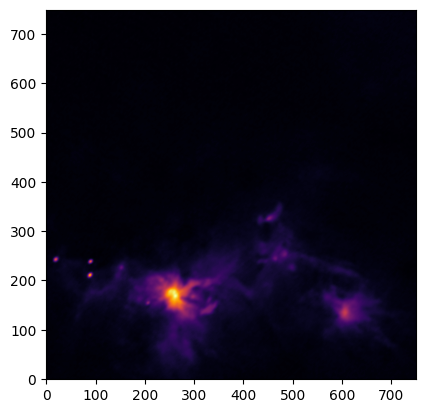

In [ ]:
fit = plt.figure()
plt.imshow(source_alma.data, origin='lower', cmap='inferno')
print(source_alma.data.shape)

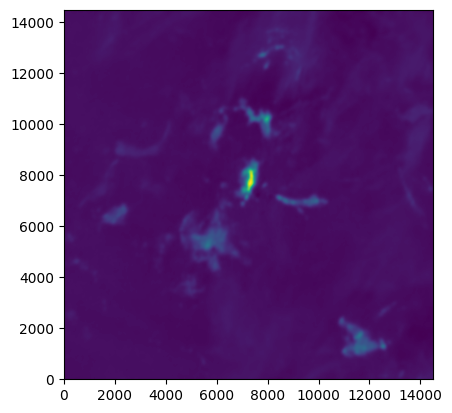

In [ ]:
plt.imshow(CO_moment0_reproj_image_to_alma, origin='lower', cmap='viridis')

In [ ]:





overview_CO = Cutout2D(CO_moment0_reproj_image, overview_reg.center, (overview_reg.width, overview_reg.height), wcs=wcs_header)
zoomin_CO = Cutout2D(CO_moment0_reproj_image, zoomin_reg.center, (zoomin_reg.width, zoomin_reg.height), wcs=wcs_header)
source_reg_alma_cocube = Regions.read('regions/outflow_source_alma_cocube.reg')[0]

source_CO = Cutout2D(CO_moment0_reproj_image_to_alma, source_reg_alma_cocube.center, (source_reg_alma_cocube.height, source_reg_alma_cocube.width), wcs=wcs_CO_moment0_reproj_image_to_alma)


moxc = Table.read('/orange/adamginsburg/w51/TaehwaYoo/w51_moxc.fits')
ra = moxc['RAJ2000']
dec = moxc['DEJ2000']
moxc.pprint(max_lines=-1, max_width=-1)
skycoord_moxc = SkyCoord(ra.value, dec.value, unit='deg', frame='icrs')
moxc_ind_zoomin = zoomin_reg.contains(skycoord_moxc, zoomin_alma.wcs)
ra_moxc_zoomin = ra[moxc_ind_zoomin]
dec_moxc_zoomin = dec[moxc_ind_zoomin]
radec= np.vstack((ra_moxc_zoomin, dec_moxc_zoomin)).T
radec_pix = zoomin_alma.wcs.wcs_world2pix(radec, 0)
ra_pix = radec_pix[:, 0]
dec_pix = radec_pix[:, 1]



 _RAJ2000   _DEJ2000 Region  p         CXOU        Label   RAJ2000    DEJ2000  ePos      PosType       no_m   no_t   no_s   no_h   KS_S   KS_M   ExpNom ExpFrac    Ct   Nobs Nph Fdis b_theta theta B_theta PSFf   Area  aglow Oct_t Oct_s Oct_h bgScl  bgct_t bgct_s bgct_h b_Nct_t Nct_t  B_Nct_t b_Nct_s Nct_s B_Nct_s b_Nct_h Nct_h B_Nct_h Area_t Area_s Area_h E_t  E_s  E_h    XFlx_t     XFlx_s     XFlx_h    EFlx_t  EFlx_s  EFlx_h
   deg        deg                                            deg        deg    arcs                                                                s               ct                   arcm   arcm   arcm                       ct    ct    ct           ct     ct     ct      ct     ct      ct      ct     ct     ct      ct     ct     ct    cm2    cm2    cm2   keV  keV  keV  ph s / cm2 ph s / cm2 ph s / cm2 mW / m2 mW / m2 mW / m2
---------- --------- ------ --- ------------------ ------ ---------- --------- ---- ----------------- ------ ------ ------ ------ ------ -----

In [ ]:
source_CO.data.shape

(750, 750)

In [ ]:
h2k_gtc_image = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/gtc/adendawson/real_reduction/reduced_images/H2_minus_K.fits')
h2k_gtc_wcs = WCS(fits.getheader('/orange/adamginsburg/w51/TaehwaYoo/gtc/adendawson/real_reduction/reduced_images/H2_minus_K.fits'))
#h2k_gtc_reproj_image, _ = reproject_interp((h2k_gtc_image, h2k_gtc_wcs), wcs_header, )
h2k_gtc_reproj_image = fits.getdata('/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/h2k_reproj_f140.fits')
hdu = fits.PrimaryHDU(data=h2k_gtc_reproj_image, header=tgt_header)
reproj_dir2 = '/orange/adamginsburg/jwst/w51/data_reprojected_for_outflowplot/'
hdu.writeto(reproj_dir2 + 'h2k_reproj_f140.fits', overwrite=True)
zoomin_h2k = Cutout2D(h2k_gtc_reproj_image, zoomin_reg.center, (zoomin_reg.width, zoomin_reg.height), wcs=wcs_header)



WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(290.92550868894966) np.float64(14.5134512533438) 
CRPIX : np.float64(2155.3397315706416) np.float64(-392.56538413687076) 
PC1_1 PC1_2  : np.float64(0.3972077325221708) np.float64(-0.917728727470485) 
PC2_1 PC2_2  : np.float64(-0.917728727470485) np.float64(-0.3972077325221708) 
CDELT : np.float64(8.67472981026655e-06) np.float64(8.67472981026655e-06) 
NAXIS : 1345  535


/scratch/local/9577841/ipykernel_3259157/2236785044.py:79: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax_overview.annotate('W51-IRS2E', xy=(0.95, 0.45), xycoords='axes fraction', fontsize=30, color='k', ha='center', va='center',


(535, 1345, 3)
Region: RectanglePixelRegion
center: PixCoord(x=485.01075170871695, y=116.4094635155817)
width: 184.6839565363669
height: 238.80668273277217
angle: 90.0 deg


/scratch/local/9577841/ipykernel_3259157/2236785044.py:109: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax_knot.annotate('knot', xy=(0.33, 0.57), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
/scratch/local/9577841/ipykernel_3259157/2236785044.py:125: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax_source.annotate('W51north', xy=(0.86, 0.6), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
/scratch/local/9577841/ipykernel_3259157/2236785044.py:127: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax_source.annotate('W51-IRS2E', xy=(0.87, 0.3), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
/scratch/local/9577841/ipykernel_3259157/

[-0.86810671  1.69519187  4.25849046  6.82178904  9.38508762 11.9483862
 14.51168478 17.07498336 19.63828195 22.20158053]
80.6164830853158
80.6164830853158
80.6164830853158
80.6164830853158


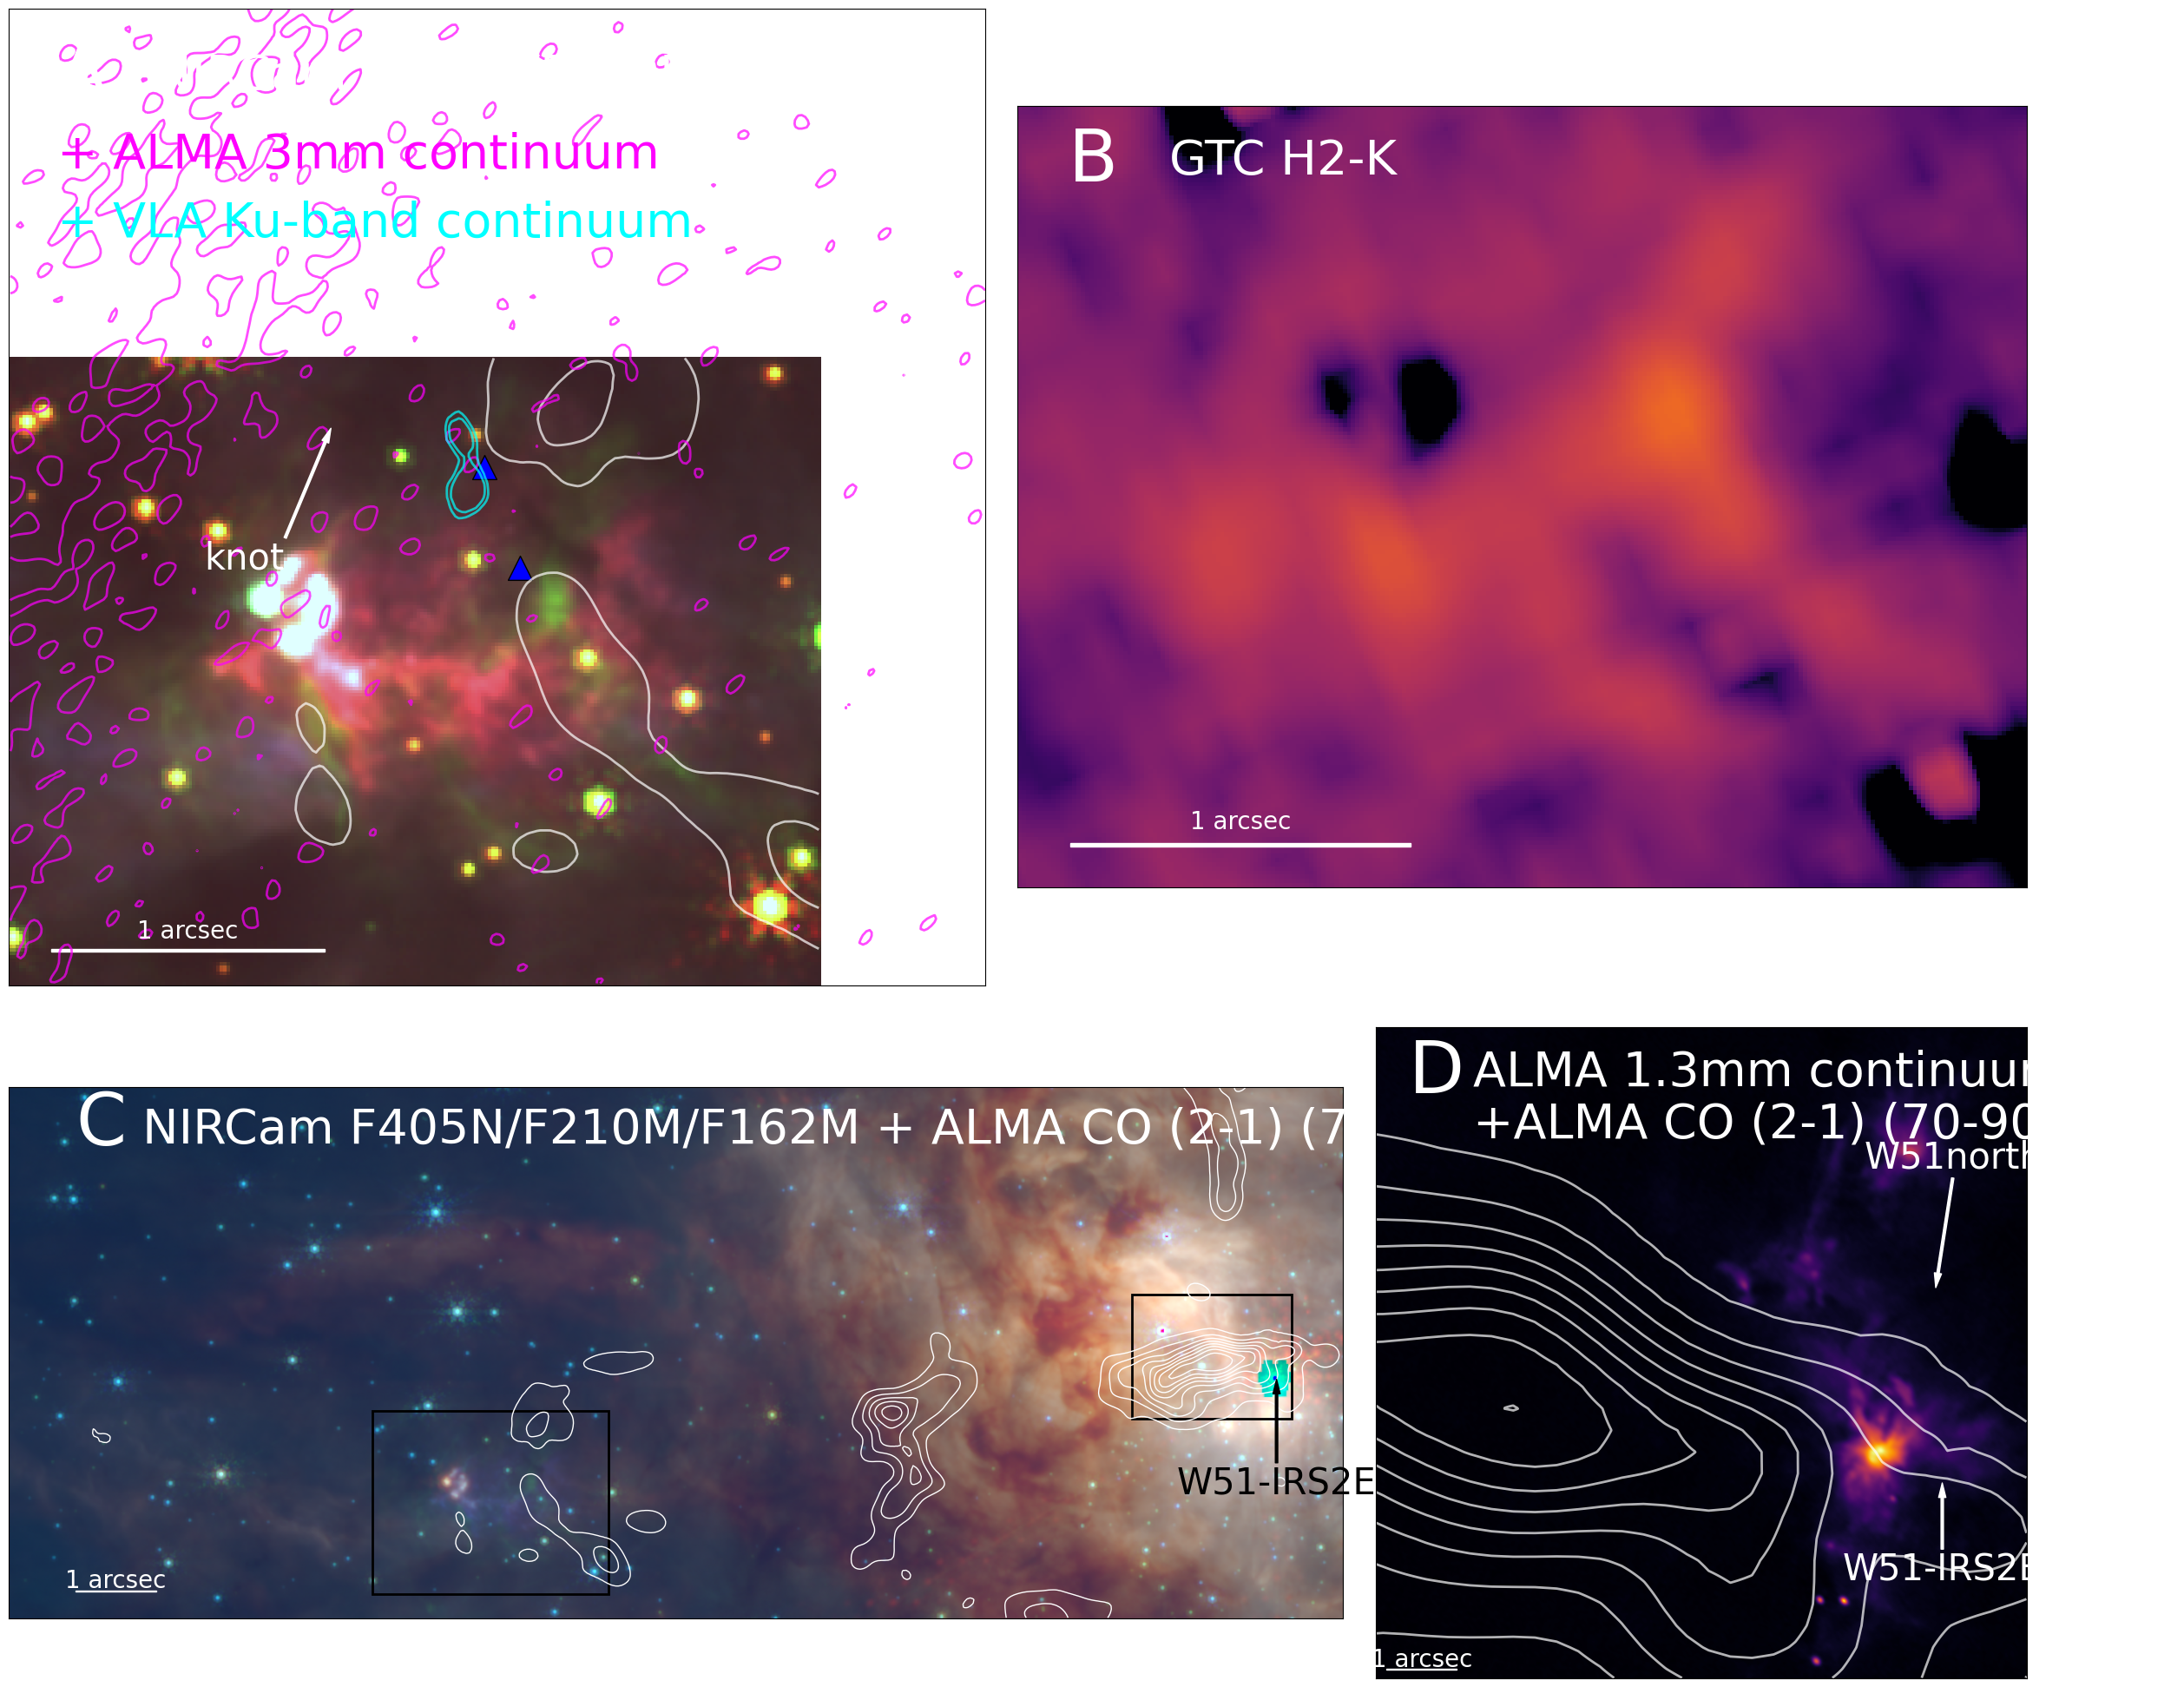

In [ ]:
import matplotlib.gridspec as gridspec
from colorama import Fore, Style
from regions import RectangleSkyRegion
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap, Normalize

class PiecewiseNormalize(Normalize):
    def __init__(self, vmin1, vmax1, vmin2, vmax2, turn_value):
        super().__init__(vmin=vmin1, vmax=vmax2)
        self.vmin1 = vmin1
        self.vmax1 = vmax1
        self.vmin2 = vmin2
        self.vmax2 = vmax2
        self.turn_value = turn_value
        self.norm_low = simple_norm([vmin1, vmax1], stretch='log', min_cut=vmin1, max_cut=vmax1)
        self.norm_high = simple_norm([vmin2, vmax2], stretch='log', min_cut=vmin2, max_cut=vmax2)

    def __call__(self, value, clip=None):
        value = np.ma.array(value)
        # Map low values to [0, 0.5]
        low_mask = value <= self.turn_value
        high_mask = ~low_mask

        result = np.ma.empty(value.shape)
        result[low_mask] = 0.5 * self.norm_low(value[low_mask])
        result[high_mask] = 0.5 + 0.5 * self.norm_high(value[high_mask])
        return result

def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20):

    scaled_length = (length / pixel_scale).to(u.deg/u.deg)
    print(scaled_length)
    ax.add_patch(Rectangle((xpos, ypos), scaled_length.value, 0.01 * scaled_length.value, color=color))
    if label:
        ax.text(xpos + scaled_length.value / 2, ypos + 0.05 * scaled_length.value, label, color=color, fontsize=fontsize, ha='center')


overview_shape = rgbimage_overview.shape  # (height, width)
zoomin_shape = rgbimage_zoomin.shape
print(overview_wcs)
# Aspect ratios

overview_ratio = overview_shape[1] / overview_shape[0]
zoomin_ratio = zoomin_shape[1] / zoomin_shape[0]

# Set a base height (e.g., 10 inches for each row)
base_height = 10
top_width = overview_ratio * base_height
bottom_width = 2 * zoomin_ratio * base_height  # two panels side by side

fig_width = max(top_width, bottom_width)
fig_height = 2 * base_height  # one row for top, one for bottom

fig = plt.figure(figsize=(30,25))
#gs = gridspec.GridSpec(2, 3, height_ratios=[overview_shape[0], zoomin_shape[0]], width_ratios=[zoomin_shape[1], zoomin_shape[1]], wspace=0, hspace=0)

gs = gridspec.GridSpec(2, 3, height_ratios=[1.5,1], width_ratios=[1.5,0.5,1.0], wspace=0.05, hspace=0.05)

# Top panel (spans both columns)
ax_overview = fig.add_subplot(gs[1, 0:2])
# Bottom left
ax_knot = fig.add_subplot(gs[0, 0])
# Bottom right
ax_source = fig.add_subplot(gs[1, 2])
ax_knot_gtc = fig.add_subplot(gs[0, 1:3])
ax_overview.imshow(rgbimage_overview, origin='lower')
levels = np.linspace(np.nanmin(overview_CO.data), np.nanmax(overview_CO.data), 10)  # adjust number of levels as needed
ax_overview.contour(overview_CO.data, levels=levels, colors='white', linewidths=1, )
"""
ax_overview.text(0.05, 0.93, 'A', transform=ax_overview.transAxes, fontsize=60, color='white', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
ax_overview.text(0.1, 0.92, 'NIRCam ', transform=ax_overview.transAxes, fontsize=40, color='white', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
ax_overview.text(0.2, 0.92, 'F162M, ', transform=ax_overview.transAxes, fontsize=40, color='blue', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
ax_overview.text(0.29, 0.92, 'F210M, ', transform=ax_overview.transAxes, fontsize=40, color='green', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
ax_overview.text(0.38, 0.92, 'F405N ', transform=ax_overview.transAxes, fontsize=40, color='red', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
ax_overview.text(0.46, 0.92, '+ ALMA CO (2-1) (70-90km/s)', transform=ax_overview.transAxes, fontsize=40, color='white', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5))
"""
ax_overview.text(0.05, 0.93, 'C', transform=ax_overview.transAxes, fontsize=60, color='white', ha='left', va='center')
ax_overview.text(0.1,0.92, 'NIRCam F405N/F210M/F162M + ALMA CO (2-1) (70-90km/s)', transform=ax_overview.transAxes, fontsize=40, color='white', ha='left', va='center')
ax_overview.annotate('W51-IRS2E', xy=(0.95, 0.45), xycoords='axes fraction', fontsize=30, color='k', ha='center', va='center',
                arrowprops=dict( color='k', width=2,headwidth=6, frac=0.07, ec='k', fc='k'), textcoords='offset pixels', xytext=(0,-120))
ax_overview.set_xticks([])
ax_overview.set_yticks([])

zoomin_reg_pix = zoomin_reg.to_pixel(overview_wcs)
zoomin_reg_pix.angle = 90*u.deg
zoomin_reg_pix.plot(ax=ax_overview, facecolor='none', edgecolor='k', lw=2)
print(rgbimage_overview.shape)
print(zoomin_reg_pix)

source_reg_pix = source_reg.to_pixel(overview_wcs)
source_reg_pix.angle = 90*u.deg
source_reg_pix.plot(ax=ax_overview, facecolor='none', edgecolor='k', lw=2)

ax_knot.imshow(rgbimage_zoomin, origin='lower')
ax_knot.contour(zoomin_CO.data, levels=levels, colors='white', linewidths=2, alpha=0.7)


levels = np.linspace(5.25e-5, 8.75e-5, 3)
levels = [5.25e-5]
ax_knot.contour(zoomin_alma.data, levels=levels, colors='magenta', linewidths=2, alpha=0.7)
levels = [1e-4, 2e-4]  # adjust number of levels as needed
ax_knot.contour(zoomin_vla.data, levels=levels, colors='cyan', linewidths=2, alpha=0.7)
ax_knot.text(0.05, 0.93, 'A', transform=ax_knot.transAxes, fontsize=60, color='white', ha='left', va='center',)
ax_knot.text(0.15, 0.93, 'NIRCam F162M/F210M/F187N', transform=ax_knot.transAxes, fontsize=40, color='white', ha='left', va='center') 
ax_knot.text(0.05, 0.85, '+ ALMA 3mm continuum', transform=ax_knot.transAxes, fontsize=40, color='magenta', ha='left', va='center')
ax_knot.text(0.05, 0.78, '+ VLA Ku-band continuum', transform=ax_knot.transAxes, fontsize=40, color='cyan', ha='left', va='center')
ax_knot.set_xticks([])
ax_knot.set_yticks([])
ax_knot.annotate('knot', xy=(0.33, 0.57), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
                arrowprops=dict( color='white', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(-100,-150))

levels = np.linspace(np.nanmin(overview_CO.data), np.nanmax(overview_CO.data), 10)  # adjust number of levels as needed
print(levels)

ax_knot.scatter(ra_pix, dec_pix, s=400, color='b', edgecolor='black', lw=1, marker='^')


ax_source.imshow(np.rot90(source_alma.data,k=3), origin='lower', cmap='inferno')
ax_source.contour(np.rot90(source_CO.data,k=3), levels=levels, colors='white', linewidths=2, alpha=0.7)
ax_source.set_xticks([])
ax_source.set_yticks([])
ax_source.text(0.05, 0.93, 'D', transform=ax_source.transAxes, fontsize=60, color='white', ha='left', va='center')
ax_source.text(0.15, 0.93, 'ALMA 1.3mm continuum', transform=ax_source.transAxes, fontsize=40, color='white', ha='left', va='center')
ax_source.text(0.15, 0.85, '+ALMA CO (2-1) (70-90km/s)', transform=ax_source.transAxes, fontsize=40, color='white', ha='left', va='center')
ax_source.annotate('W51north', xy=(0.86, 0.6), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
                arrowprops=dict( color='white', width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(20,150))
ax_source.annotate('W51-IRS2E', xy=(0.87, 0.3), xycoords='axes fraction', fontsize=30, color='white', ha='center', va='center',
                arrowprops=dict( color='white',width=2,headwidth=6, frac=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(0,-100))
overview_pixel_scale = np.abs(overview_wcs.pixel_scale_matrix[0,0])*u.deg

zoomin_pixel_scale = np.abs(zoomin_alma.wcs.pixel_scale_matrix[0,0]*u.deg)
"""
cmap_low = plt.cm.grey
cmap_high = plt.cm.gist_heat
vmin1=vmin2=-11.79127379938018
vmax1=vmax2=1391.757128666562
norm_low = simple_norm(zoomin_h2k.data, stretch='log', min_cut=vmin1, max_cut=vmax1)
norm_high = simple_norm(zoomin_h2k.data, stretch='log', min_cut=vmin2, max_cut=vmax2)
n_low = 128
n_high = 128
colors_low = cmap_low(np.linspace(0, 1, n_low))
colors_high = cmap_high(np.linspace(0, 1, n_high))
combined_colors = np.vstack((colors_low, colors_high))
combined_cmap = LinearSegmentedColormap.from_list('CombinedLogCmap', combined_colors)
norm_combined = PiecewiseNormalize(vmin1, vmax1, vmin2, vmax2, 10)
"""
norm = simple_norm(zoomin_h2k.data, stretch='log', min_cut=-11.79127379938018, max_cut=1391.757128666562)
ax_knot_gtc.imshow(zoomin_h2k.data, cmap=plt.cm.inferno, norm=norm, origin='lower')
ax_knot_gtc.set_xticks([])
ax_knot_gtc.set_yticks([])
ax_knot_gtc.text(0.05, 0.93, 'B', transform=ax_knot_gtc.transAxes, fontsize=60, color='white', ha='left', va='center')
ax_knot_gtc.text(0.15, 0.93, 'GTC H2-K', transform=ax_knot_gtc.transAxes, fontsize=40, color='white', ha='left', va='center')

add_scalebar(ax_overview, 0.05* overview_shape[1], 0.05*overview_shape[0], 1*u.arcsec, pixel_scale=overview_pixel_scale, label='1 arcsec', color='white', fontsize=20)
add_scalebar(ax_knot, 0.05* zoomin_shape[1], 0.05*zoomin_shape[0], 1*u.arcsec, pixel_scale=zoomin_pixel_scale, label='1 arcsec', color='white', fontsize=20)
add_scalebar(ax_source, 0.05* zoomin_shape[1], 0.05*zoomin_shape[0], 1*u.arcsec, pixel_scale=zoomin_pixel_scale, label='1 arcsec', color='white', fontsize=20)
add_scalebar(ax_knot_gtc, 0.05* zoomin_shape[1], 0.05*zoomin_shape[0], 1*u.arcsec, pixel_scale=zoomin_pixel_scale, label='1 arcsec', color='white', fontsize=20)
plt.tight_layout()
plt.savefig('plots/outflow.png', dpi=100, bbox_inches='tight') 
 

In [ ]:
eflux_t = moxc['EFlx_t'][moxc_ind_zoomin]
eflux_s = moxc['EFlx_s'][moxc_ind_zoomin]
eflux_h = moxc['EFlx_h'][moxc_ind_zoomin]
E_t = moxc['E_t'][moxc_ind_zoomin]
E_s = moxc['E_s'][moxc_ind_zoomin]
E_h = moxc['E_h'][moxc_ind_zoomin]
print('eflux_t:', eflux_t)
print('eflux_s:', eflux_s)
print('eflux_h:', eflux_h)
print('E_t:', E_t)
print('E_s:', E_s)
print('E_h:', E_h)
print('ra_moxc_zoomin:', ra_moxc_zoomin)
print('dec_moxc_zoomin:', dec_moxc_zoomin)

eflux_t:  EFlx_t
mW / m2
-------
  1e-15
  1e-15
eflux_s:  EFlx_s
mW / m2
-------
  4e-16
  2e-16
eflux_h:  EFlx_h
mW / m2
-------
  9e-16
  1e-15
E_t: E_t 
keV 
----
1.85
2.35
E_s: E_s 
keV 
----
 1.8
1.92
E_h: E_h 
keV 
----
2.71
 2.4
ra_moxc_zoomin:  RAJ2000  
   deg    
----------
290.915104
290.915386
dec_moxc_zoomin:  DEJ2000 
   deg   
---------
14.525093
14.525112


/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/regions/shapes/rectangle.py:205: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,


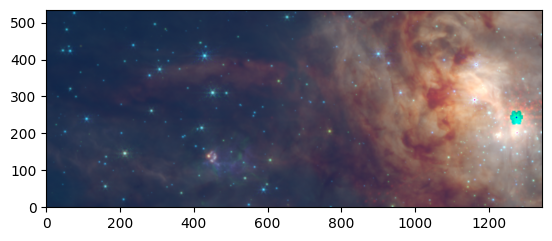

In [ ]:
fig, ax = plt.subplots()
ax.imshow(rgbimage_overview, origin='lower')
reg_zoomin_pix = zoomin_reg.to_pixel(wcs_header)
reg_zoomin_pix.plot(ax=ax, color='yellow', lw=3)
plt.show()